In [30]:
import numpy as np
import matplotlib.pyplot as plt

from DriveCalc import *

In [7]:
motor_table = get_motor_database()

In [8]:
for col in motor_table.columns:
            print(col)

myid
tbs
Name
Rem
custom
meas
match
StatDia
StatH
Turns
WireDia
Delta
Imax
Weight
mgear_id
mesc_id
kV
Rm
K
MvK
kL
ts


In [25]:
class MotorGeneric():
    """
    This class describes an electric motor chaaracterized by
    the generator voltage coefficient, the effective winding resistance
    and the no-load power.
    """
    
    def __init__(self, kV, Ri, I0):
        """
        Generate a generic electric motor.
        """
        self.Name = 'generic'
        print(self.Name)
        self.kV = kV
        self.Ri = Ri
        self.I0 = I0

    def noLoadRPM(self, U):
        """
        Compute the RPM at no load at given voltage.
        """
        return U*self.kV
    
    def shaftPowerFromRPM(self, rpm, U):
        """
        Given the battery voltage, the shaft power output is computed
        from the revolution speed (max noLoadRPM)
        """
        if rpm < self.noLoadRPM(U):
            U_wirk = U - rpm/self.kV
            I_wirk = U_wirk/self.Ri
            return U_wirk*I_wirk
        else:
            return 0.0

    def currentFromRPM(self, rpm, U):
        """
        Given the battery voltage, the current consumption is computed
        from the revolution speed (max noLoadRPM)
        """
        if rpm < self.noLoadRPM(U):
            U_wirk = U - rpm/self.kV
            return U_wirk/self.Ri + self.I0
        else:
            return 0.0

In [26]:
mot = MotorGeneric(1500,0.2,1.0)

generic


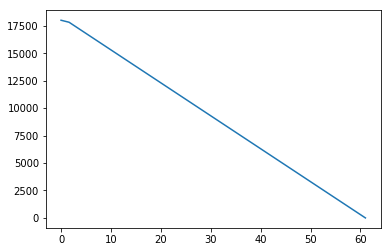

In [31]:
rpmList = np.linspace(0,mot.noLoadRPM(12.0),100)
iList = [mot.currentFromRPM(rpm,12.0) for rpm in rpmList]

plt.plot(iList,rpmList)
plt.show()